# Assignment for Introduction to Deep learning & Neural Networks with Keras - Coursera

- Data: concrete_data.csv
- Target: to predict Strength of Cement basing on properties of it
- Models - Deep Learnign models with multiple layers created with Keras

In [5]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import keras
#Importing Data
df = pd.read_csv('concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [74]:
#Checking if null observations exist
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64


## Preparing data to build models on it
- Dividing dataframe for predictor and target variables
- Splitting data(70% for training, 30% for testing)

In [9]:
df_columns = df.columns

X = df[df_columns[df_columns != 'Strength']] 
y = df['Strength'] 

In [75]:
from sklearn.model_selection import train_test_split
#Random state if anybody would like to compare results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", y_test.shape)
#Number of columns is important to use as input for first layer of DL model
n_cols = X.shape[1]


X_train shape: (721, 8)
y_train shape: (721,)
X_test shape: (309, 8)
Y_test shape: (309,)


## Exercise A 
- Baseline model (1 hidden layer with 10 nodes, 50 epochs, no normalization of data)

In [23]:
from keras.models import Sequential
from keras.layers import Dense

#Function for initializing the model
def build_model(optimizer, lossFunction):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(1))
        
    model.compile(optimizer=optimizer, loss=lossFunction)
    return model

In [48]:
#Initializing list to store MSE values of each of 50 iterations
A_MSE_list=[]
#50 iterations as suggested in exercise description
for i in range(0,50):
    #Assuming that the 50 iterations is to compare how the model is behaving depending on random state.
    #Therefore i'm initiating new model each time when starting a loop
    modelA = build_model(optimizer='adam', lossFunction='mean_squared_error')
    #Fitting the model to train data
    modelA.fit(X_train, y_train, epochs=50, verbose=0)
    #Evaluating the model on test data (30% of original dataframe)
    A_MSE = modelA.evaluate(X_test, y_test, verbose=0)
    A_MSE_list.append(A_MSE)

In [64]:
#Initializing model errors dictionary - it'll be used for comparison at the end of exercise
model_errors = {}
#Defining function to calculate models error mean and std
def analyze_errors(error_list, model_name):
    error_mean = np.mean(error_list)
    error_std = np.std(error_list)
    model_errors[model_name] = [error_mean, error_std]
#Adding mean and std of model A to the dictionary
analyze_errors(A_MSE_list, 'Model_A')


In [77]:
print('Model_A: ',model_errors['Model_A'])

Model_A:  [358.4188880535237, 427.4965590076415]


### Summary of model from exercise A
Our baseline model with one hidden layer of 10 nodes, and without normalization of data produced MSE mean at 358.41 and standard deviation of MeanSquaredError at 427.49 - not great, not terrible.

After couple of exercises we'll be able to compare it to other more sophisticated models


## Exercise B
 Model (1 hidden layer with 10 nodes, 50 epochs, with normalization of data)
 

In [54]:
#Normalization of predictor variables
X_norm = (X - X.mean()) / X.std()

X_train_n, X_test_n, y_train, y_test = train_test_split(X_norm, y, test_size=0.3, random_state=10)
X_train_n.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
426,-1.027381,0.226058,1.651822,-0.433979,0.585108,0.440892,-0.336516,-0.501222
835,-1.312531,-0.856472,1.887770,-1.103636,1.974498,-0.384790,0.878312,-0.279597
242,-0.492485,-0.856472,1.000229,0.638409,-0.017520,0.709688,-0.199318,0.163652
823,0.390714,-0.856472,-0.846733,1.003676,-1.038638,0.013904,0.329519,2.126612
157,0.779207,1.334087,-0.846733,-0.780515,0.903161,-0.362926,-0.221768,0.163652


In [60]:
#Initializing list to store MSE values of each of 50 iterations
B_MSE_list=[]
#50 iterations as suggested in exercise description
for i in range(0,50):
    #Assuming that the 50 iterations is to compare how the model is behaving depending on random state.
    #Therefore i'm initiating new model each time when starting a loop
    modelB = build_model(optimizer='adam', lossFunction='mean_squared_error')
    #Fitting the model to train data
    modelB.fit(X_train_n, y_train, epochs=50, verbose=0)
    #Evaluating the model on test data (30% of original dataframe)
    B_MSE = modelB.evaluate(X_test_n, y_test, verbose=0)
    B_MSE_list.append(B_MSE)

#Adding mean and std of model B to the dictionary   
analyze_errors(B_MSE_list, 'Model_B')

In [82]:
analyze_errors(B_MSE_list, 'Model_B')
print('model_A : ',model_errors['Model_A'])
print('model_B : ',model_errors['Model_B'])

model_A :  [358.4188880535237, 427.4965590076415]
model_B :  [357.6456736306002, 97.90472390610482]


### Model B summary
Normalizing the data significantly decreased standard deviation of MSE of 50 runs of model fitting.
However, mean of MSE has not been lower after normalizing the data which is interesting.

All in all, we have more consistent model, however accuracy remains almost the same after normalizing the data.

## Exercise C
Model (1 hidden layer with 10 nodes, increased epochs to 100, with normalization of data)


In [66]:
#Initializing list to store MSE values of each of 50 iterations
C_MSE_list=[]
#50 iterations as suggested in exercise description
for i in range(0,50):
    #Assuming that the 50 iterations is to compare how the model is behaving depending on random state.
    #Therefore i'm initiating new model each time when starting a loop
    modelC = build_model(optimizer='adam', lossFunction='mean_squared_error')
    #Fitting the model to normalized train data.
    #Using 100 epochs which in theory should increasy fittnes of the model
    modelC.fit(X_train_n, y_train, epochs=100, verbose=0)
    #Evaluating the model on test data (30% of original dataframe)
    C_MSE = modelC.evaluate(X_test_n, y_test, verbose=0)
    C_MSE_list.append(C_MSE)

   
#Adding mean and std of model C to the dictionary   
analyze_errors(C_MSE_list, 'Model_C')

{'Model_A': [358.4188880535237, 427.4965590076415], 'Model_B': [357.6456736306002, 97.90472390610482], 'Model_C': [151.7652090123248, 11.821520687696443]}


In [83]:
print('model_A : ',model_errors['Model_A'])
print('model_B : ',model_errors['Model_B'])
print('model_C : ',model_errors['Model_C'])

model_A :  [358.4188880535237, 427.4965590076415]
model_B :  [357.6456736306002, 97.90472390610482]
model_C :  [151.7652090123248, 11.821520687696443]


### Model C summary
Increasing number of epochs, meaning more iterations for model to train signifanctly increased fitness of the model, and therefore accuracy of it. Model is still not overfitted as mean of MSE decreased from 357.6 (Model B) to 151.7 (Model C).
Standard deviation is also decreased after changing number of epochs to 100

All in all, we have more consistent and accurate model than in exercise B.

## Exercise C
Model (3 hidden layer with 10 nodes, 50 epochs, with normalization of data)

In [67]:
#We need to define new build_model function to include 3 hidden layers instead of 1
def build_model_D(optimizer, lossFunction):
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu', input_shape=(10,)))
    model.add(Dense(10, activation='relu', input_shape=(10,)))
    model.add(Dense(1))
        
    model.compile(optimizer=optimizer, loss=lossFunction)
    return model

#Initializing list to store MSE values of each of 50 iterations
D_MSE_list=[]
#50 iterations as suggested in exercise description
for i in range(0,50):
    #Assuming that the 50 iterations is to compare how the model is behaving depending on random state.
    #Therefore i'm initiating new model each time when starting a loop
    modelD = build_model_D(optimizer='adam', lossFunction='mean_squared_error')
    #Fitting the model to normalized train data.
    modelD.fit(X_train_n, y_train, epochs=100, verbose=0)
    #Evaluating the model on test data (30% of original dataframe)
    D_MSE = modelD.evaluate(X_test_n, y_test, verbose=0)
    D_MSE_list.append(D_MSE)

#Adding mean and std of model D to the dictionary      
analyze_errors(D_MSE_list, 'Model_D')
print(model_errors)

{'Model_A': [358.4188880535237, 427.4965590076415], 'Model_B': [357.6456736306002, 97.90472390610482], 'Model_C': [151.7652090123248, 11.821520687696443], 'Model_D': [86.51849243830706, 16.714986485210186]}


In [70]:
#Creating dataframe of models errors
model_errors_df = pd.DataFrame.from_dict(model_errors, orient='index', columns=['Mean', 'Std'])
model_errors_df

,Mean,Std
Model_A,358.418888,427.496559
Model_B,357.645674,97.904724
Model_C,151.765209,11.821521
Model_D,86.518492,16.714986


## Model D summary
As we can see in the table and on bar plot, by adding more layers to model B, we created most accurate model of all 4.

Mean of MSE is lowest at 86.5 level, However due to lower number of epochs(50) than in exercise C(100), standard deviation is little bit higher. We can accept it since accuracy of the model is really satisfactory. 

What i'd suggest for future exercises is to increase number of epochs to 100 in model D to check how good it can behave. However we have to be aware that by increasing model layers number and epochs as well we might overfit the data to train sample, and it might behave poorly on test sample.

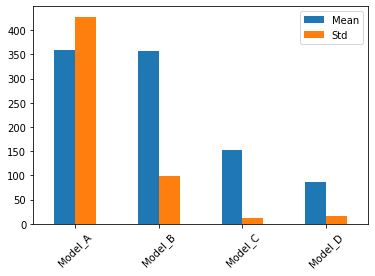

In [73]:
%matplotlib inline
ax = model_errors_df.plot.bar(rot=45)